<a href="https://colab.research.google.com/github/NagaSuryaManikanta/Myproject/blob/main/Myproject_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here's a brief overview of what's happening in the code:
1. Data loading: A dataset (Kollerudataset.csv) containing water quality parameters is loaded into a Pandas DataFrame.
2. Data preprocessing: The dataset is cleaned by removing duplicates and handling missing values.
3. Data visualization: Histograms and a heatmap are used to visualize the data's distribution and correlation between features.
4. Feature engineering: Some missing values in the dataset are filled using the mean values of corresponding features.
5. Model building: Several machine learning models like Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, AdaBoost, Bagging, and XGBoost are trained and tuned using GridSearchCV or RandomizedSearchCV for hyperparameter optimization.
6. Model evaluation: The trained models are evaluated using the test set, and their accuracy scores are printed.
7. Model deployment: The best-performing model (XGBoost) is saved to a file using pickle for future use.
8. Model prediction: An example prediction is made using the saved model and a sample input, demonstrating how to use the model for inference.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
print(pd.__version__)

2.0.3


In [4]:
df = pd.read_csv('Kollerudataset.csv')

In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


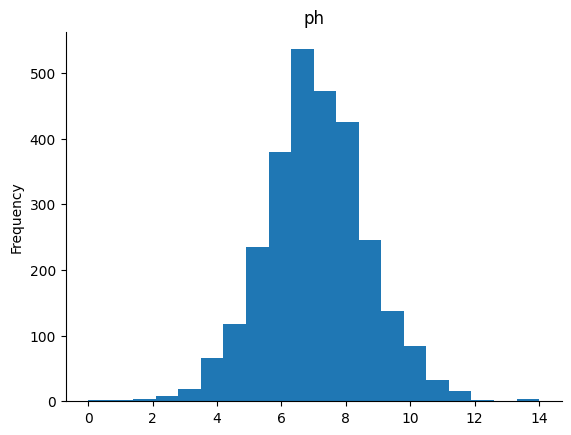

In [6]:
# @title ph

from matplotlib import pyplot as plt
df['ph'].plot(kind='hist', bins=20, title='ph')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.dropna(how='all', inplace=True)

In [10]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [11]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

<Axes: >

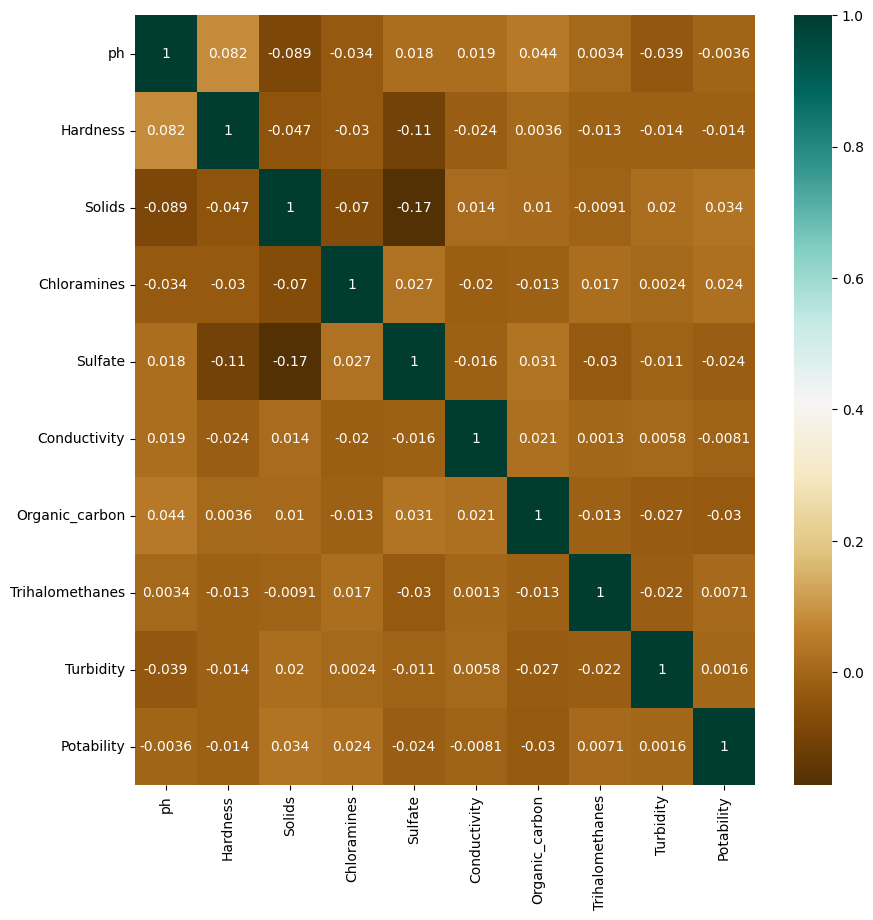

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, cmap='BrBG')

In [13]:
idx1 = df.query('Potability == 1')['ph'][df.ph.isna()].index
df.loc[idx1, 'ph'] = df.query('Potability == 1')['ph'][df.ph.notna()].mean()
idx0 = df.query('Potability == 0')['ph'][df.ph.isna()].index
df.loc[idx0,'ph'] = df.query('Potability==0')['ph'][df.ph.notna()].mean()

idx1 = df.query('Potability == 1')['Sulfate'][df.Sulfate.isna()].index
df.loc[idx1, 'Sulfate'] = df.query('Potability == 1')['Sulfate'][df.Sulfate.notna()].mean()
idx0 = df.query('Potability == 0')['Sulfate'][df.Sulfate.isna()].index
df.loc[idx0,'Sulfate'] = df.query('Potability==0')['Sulfate'][df.Sulfate.notna()].mean()

idx1 = df.query('Potability == 1')['Trihalomethanes'][df.Trihalomethanes.isna()].index
df.loc[idx1, 'Trihalomethanes'] = df.query('Potability == 1')['Trihalomethanes'][df.Trihalomethanes.notna()].mean()
idx0 = df.query('Potability == 0')['Trihalomethanes'][df.Trihalomethanes.isna()].index
df.loc[idx0,'Trihalomethanes'] = df.query('Potability==0')['Trihalomethanes'][df.Trihalomethanes.notna()].mean()

df.loc[~df.ph.between(6.5, 8.5), 'Potability'] = 0

In [14]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [15]:
X = df.drop(['Potability'], axis = 1).values
y = df['Potability'].values

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [19]:
#Hyperparameter tuning ;)

lr = LogisticRegression(random_state=42)

knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)


para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#parameters for decision tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
#"gini" for the Gini impurity and “entropy” for the information gain.
#min_samples_leaf: The minimum number of samples required to be at a leaf node, have the effect of smoothing the model

#parameters for random forest
#n_estimators: The number of trees in the forest.
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#parameters fpr AdaBoost
params_ada = {'n_estimators': [50,100,250,400,500,600], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

#XGBoost
#parameters for xgboost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)


In [20]:
grid_knn.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [21]:
grid_dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_leaf': [1, 2, 4, 5, 10, 20, 30, 40, 80,
                                              100]})

In [22]:
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 200, 350, 500]})

In [23]:
grid_ada.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.5, 0.8, 1],
                         'n_estimators': [50, 100, 250, 400, 500, 600]})

In [24]:
rs_xgb.fit(X_train, y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

Best parameters for KNN: {'n_neighbors': 39}
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 5}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 200}
Best parameters for AdaBoost: {'learning_rate': 0.8, 'n_estimators': 50}
Best parameters for XGBoost: {'n_estimators': 400, 'learning_rate': 0.5}


In [25]:
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(criterion='gini', max_depth=14, min_samples_leaf=10, random_state=42)
knn = KNeighborsClassifier(n_neighbors=16)
rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=2, random_state=42)
ada = AdaBoostClassifier(n_estimators= 50, learning_rate=0.8)
xgb = XGBClassifier(n_estimators= 50, learning_rate= 0.5)

#let's also apply bagging and boosting
bagging = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2, random_state=42),
                           n_estimators = 500, random_state = 42)
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=7,
                                                   min_samples_leaf=2,
                                                   random_state=42),
                  n_estimators=500, random_state=42)

In [26]:
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
              ('Bagging Classifier', bagging), ('XGBoost', xgb)]

In [27]:
from sklearn.metrics import accuracy_score

for classifier_name, classifier in classifiers:

    # Fit clf to the training set
    classifier.fit(X_train, y_train)

    # Predict y_pred
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)

    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))

Logistic Regression : 0.76
K Nearest Neighbours : 0.78
Decision Tree : 0.87
Random Forest : 0.88
AdaBoost : 0.87
Bagging Classifier : 0.88
XGBoost : 0.89


In [28]:
from sklearn.metrics import classification_report

y_pred_rf= knn.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       501
           1       0.65      0.13      0.22       155

    accuracy                           0.78       656
   macro avg       0.71      0.55      0.54       656
weighted avg       0.75      0.78      0.72       656



In [29]:
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix
print(precision_score(y_test, y_pred_rf))
print(recall_score(y_test, y_pred_rf))

0.6451612903225806
0.12903225806451613


In [30]:
print(confusion_matrix(y_test, y_pred_rf))

[[490  11]
 [135  20]]


In [31]:
import pickle
filename = 'model/xgboost.sav'
pickle.dump(xgb,open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open('model/xgboost.sav', 'rb'))

In [32]:
filename = 'model/scaler.sav'
pickle.dump(sc, open(filename, 'wb'))

# some time later...

# load the model from disk
scc = pickle.load(open('model/scaler.sav', 'rb'))

In [33]:
import pickle
loaded_model = pickle.load(open('model/xgboost.sav', 'rb'))
scc = pickle.load(open('model/scaler.sav', 'rb'))

In [34]:
data = df.iloc[3:4, :-1].values

In [35]:
data

array([[8.31676588e+00, 2.14373394e+02, 2.20184174e+04, 8.05933238e+00,
        3.56886136e+02, 3.63266516e+02, 1.84365245e+01, 1.00341674e+02,
        4.62877054e+00]])

In [36]:
sc_data = scc.transform(data)

In [37]:
sc_data

array([[ 8.40908294e-01,  5.47651374e-01,  4.93304442e-04,
         5.92007821e-01,  6.39205723e-01, -7.78829962e-01,
         1.25513443e+00,  2.15291047e+00,  8.48411520e-01]])

In [40]:
loaded_model.predict(sc_data)

array([0])

In [41]:
r=knn.predict([[5.73,120.5,25000,7.25645,355.567,567.545,13,74,4.2344]])[0]
r

0